### For Watson Studio Statistics For Data Science

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [71]:
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [1]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<IPython.core.display.Javascript object>

In [2]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Descriptive Statistics

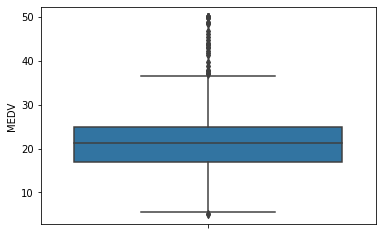

In [13]:
ax=sns.boxplot(y='MEDV', data=boston_df )


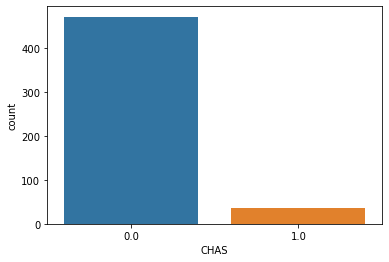

In [27]:
charles_river=sns.countplot(data=boston_df,x='CHAS')

In [30]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 and older'

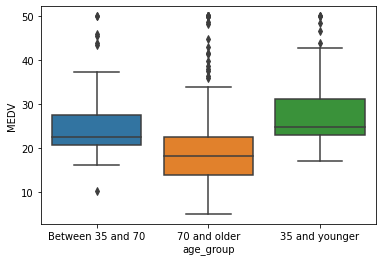

In [33]:
ax2=sns.boxplot(x='age_group',y='MEDV',data=boston_df)

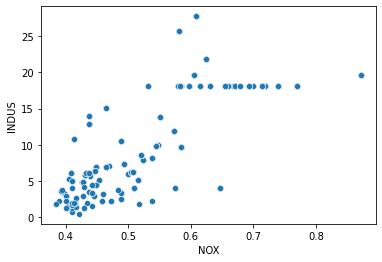

In [34]:
ax3=sns.scatterplot(x='NOX',y='INDUS', data=boston_df)

We can say that the relationship between proportion of non-retail business acres per town and nitric oxides concentration is linear so where the nitric oxide levels are less, the proportion of non-retail business acres is also less.

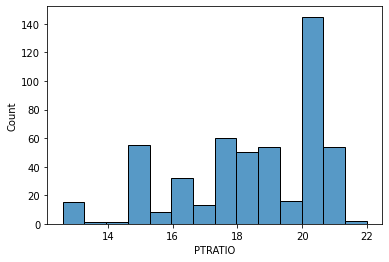

In [40]:
pt_ratio=sns.histplot(x='PTRATIO', data=boston_df)

# Hypothesis Testing

Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [46]:
#Null Hypothesis - There is no significant difference in median values of houses bounded and not bounded by the Charles river
#Alternate Hypothesis - The median value of houses change with respect to presence of Charles River binding it
#Alpha = 0.05

ttest=stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'])
print(ttest)

#Since the p-value < 0.05, we reject the null hypothesis.
#We thus conclude that there is a significant difference in median values of houses bounded and not bounded by Charles river

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [58]:
#Null Hypothesis - There is no difference in mean values of houses for each proportion of owner occupied units built prior to 1940
#Alternate Hypothesis - There is some difference between these two variables
#Alpha = 0.05

thirtyfive= boston_df[boston_df['age_group']=='35 and younger']['MEDV']
thirtyfive_seventy= boston_df[boston_df['age_group']=='Between 35 and 70']['MEDV']
seventy= boston_df[boston_df['age_group']=='70 and older']['MEDV']
print(stats.f_oneway(thirtyfive, thirtyfive_seventy, seventy))

#Since the p-value < 0.05, we reject the null hypothesis
#We thus conclude that there is a significant difference in mean values of houses for each proportion of owneroccupied units built prior to 1940

<IPython.core.display.Javascript object>

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

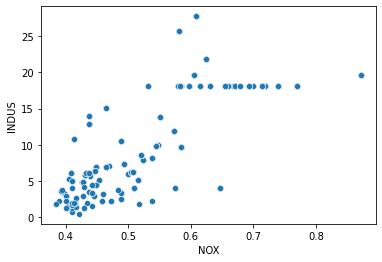

In [66]:
#Null Hypothesis - There is no relationship between Nitric oxide concentrations and proportion of 
#non-retail business acres per town

#Alternate Hypothesis - There is some relationship between the two
#Aplha=0.05

#First we plot a scatterplot to visualise the data
sctp=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

#We see a linear relationship between these two variables



In [67]:
#We then calculate the Pearson Coefficient and p-value

stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

#The Pearson Coefficient value 0.7637 shows that there is a strong positive correlation between the two variables

#Since p-value < 0.05, we reject the null hypothesis and conclude that there is a correlation between 
#Nitric oxide concentrations and proportion of non-retail business acres per town

<IPython.core.display.Javascript object>

(0.7636514469209166, 7.913361061227897e-98)

Q4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [75]:
#Null Hypothesis - The weighted distance of five Boston employment centres doesn't affect median value of owner occupied homes
#Alternate Hypothesis - The wieghted distance of the Boston employment centres affect median value of owner occupied homes
#Alpha = 0.05

x=boston_df['DIS'] #Independent Variable
y=boston_df['MEDV'] #Dependent variable

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()

predictions=model.predict(x)
print(model.summary())

#Since p-value < 0.05, we reject the null hypothesis and conclude that there is a correlation between the above two variables

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        17:12:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

C:\Users\Aniruddh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
